In [1]:
import gc
from collections import defaultdict
from itertools import combinations

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from nilearn.image import get_data, load_img, math_img, new_img_like
from nilearn.plotting import plot_roi, plot_stat_map
from scipy.ndimage import label

from survey_medley_code.config_loader import load_config

# What is in this notebook
There was a request to see the thresholded paired t-test maps with the same colorbar range for all maps.  Here I show the individual paired t-tests thresholded using the TFCE p<0.005 (Bonferroni correcting for the 10 tests, which is a bit much as the 10 tests are not independent) and then TFCE p<0.05.

Note I show the paired t-tests using the questionnaire average estimates that are not adjusted for the question length (number of characters) and adjusted for questionnaire length.  The results are similar.

In [2]:
cfg = load_config()

In [3]:
outdir = cfg.output_root / 'within_subject_question_estimates'
outdir_adjusted = cfg.output_root / 'within_subject_adjusted_questionnaire_averages'

paired_outdir = outdir / 'all_paired_t_tests'
paired_outdir_adjusted = outdir_adjusted / 'all_paired_t_tests'

In [4]:
questionnaire_names = ['brief', 'future_time', 'grit', 'impulsive_venture', 'upps']

question_pmaps = {}
question_tmaps = {}

for qa, qb in combinations(questionnaire_names, 2):
    pairing_name = f'{qa}_minus_{qb}'
    paired_pmap_loop = (
        paired_outdir
        / f'paired_test_{pairing_name}/onesample_2sided_tfce_corrp_fstat1.nii.gz'
    )
    paired_t_loop = (
        paired_outdir / f'paired_test_{pairing_name}/uncorrected_tstat1.nii.gz'
    )

    question_pmaps[pairing_name] = paired_pmap_loop
    question_tmaps[pairing_name] = paired_t_loop

In [5]:
question_pmaps_adjusted = {}
question_tmaps_adjusted = {}

for qa, qb in combinations(questionnaire_names, 2):
    pairing_name = f'{qa}_minus_{qb}'
    paired_pmap_loop = (
        paired_outdir_adjusted
        / f'paired_test_{pairing_name}/onesample_2sided_tfce_corrp_fstat1.nii.gz'
    )
    paired_t_loop = (
        paired_outdir_adjusted / f'paired_test_{pairing_name}/uncorrected_tstat1.nii.gz'
    )

    question_pmaps_adjusted[pairing_name] = paired_pmap_loop
    question_tmaps_adjusted[pairing_name] = paired_t_loop

### Bonferroni correct for the 10 tests

/tmp/ipykernel_231098/3685063663.py:20: UserWarning: empty mask
  display = plot_stat_map(


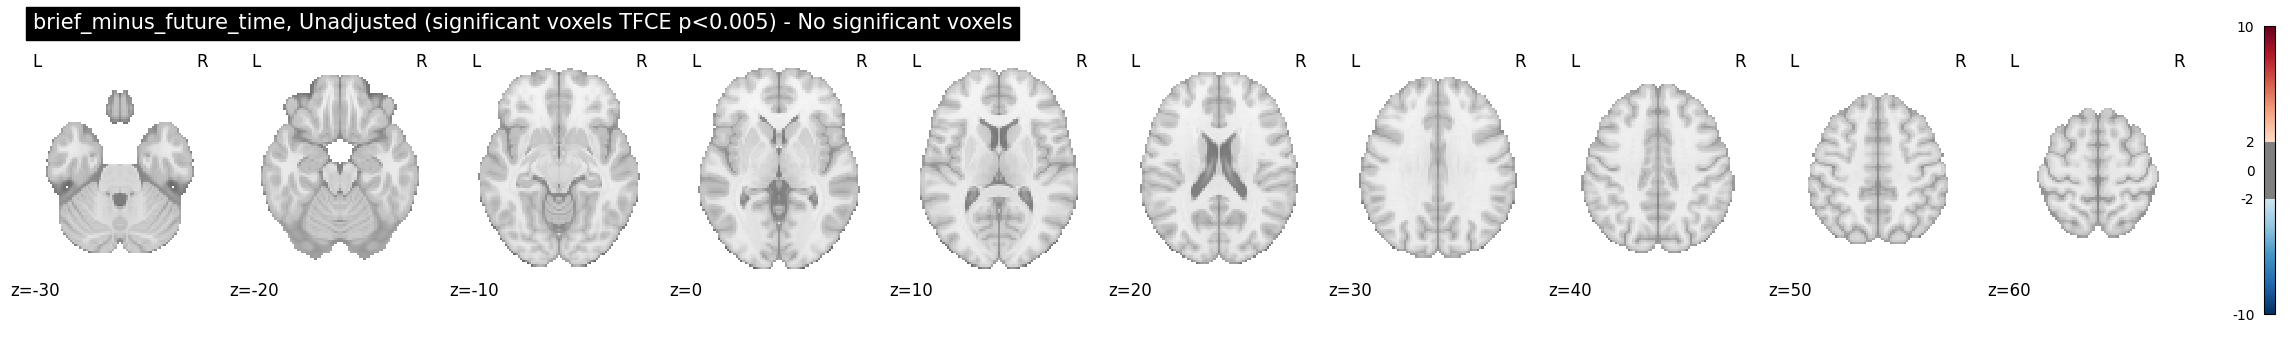

/tmp/ipykernel_231098/3685063663.py:47: UserWarning: empty mask
  display = plot_stat_map(


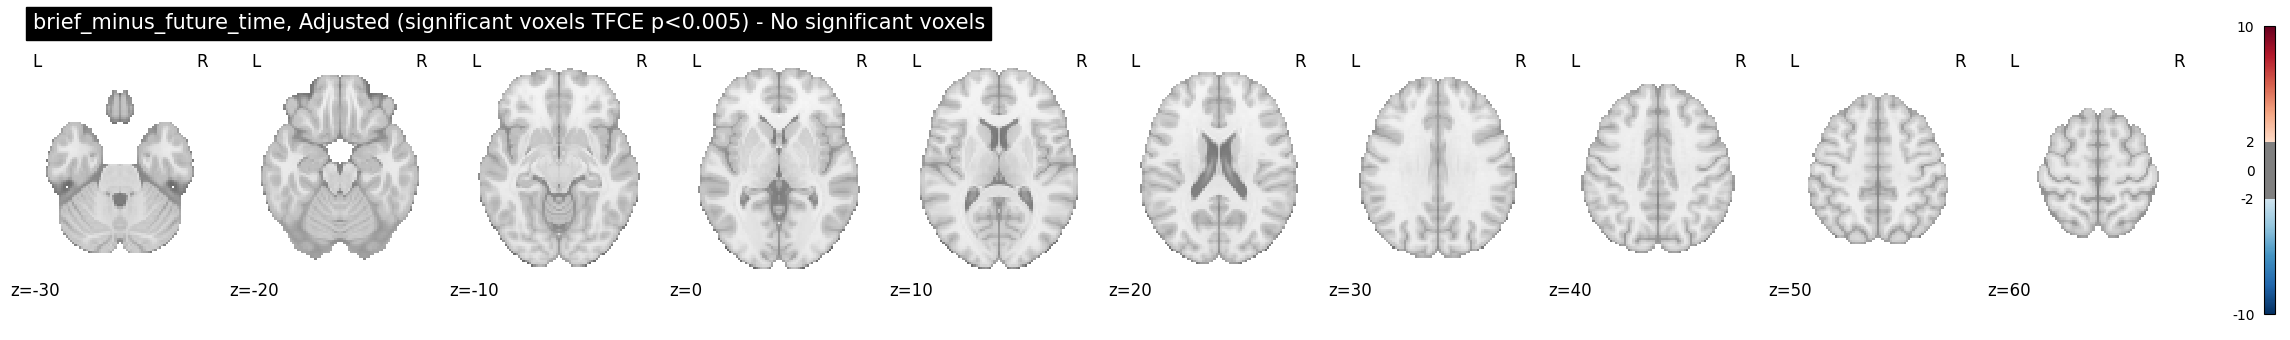

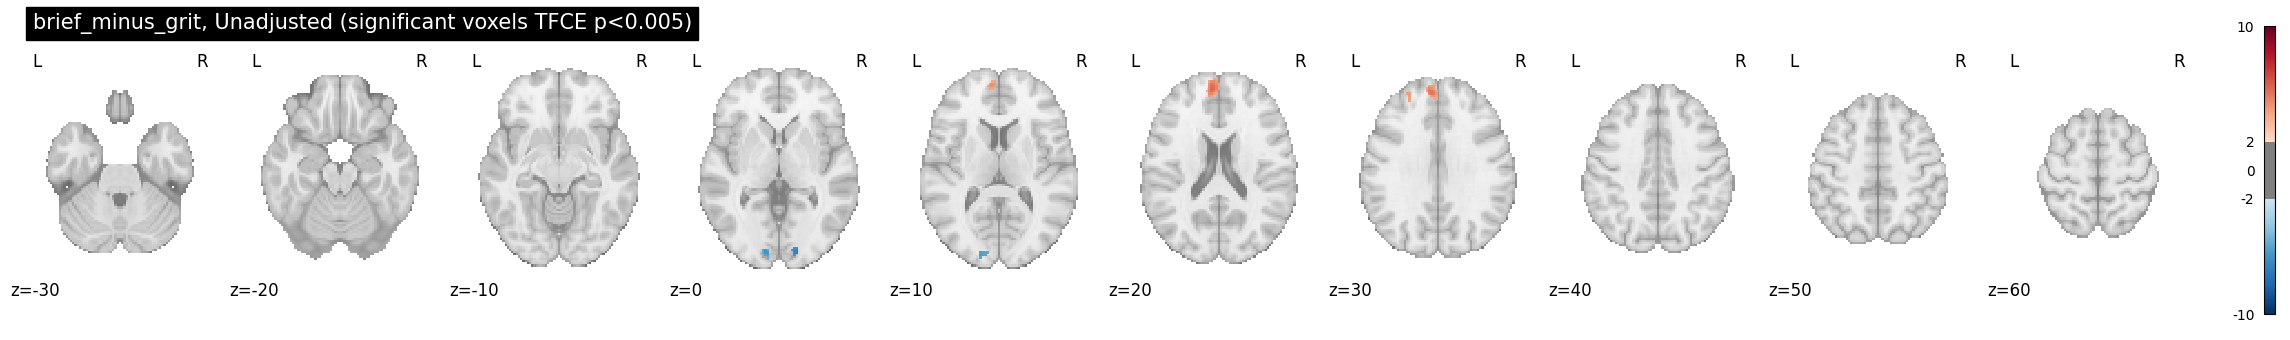

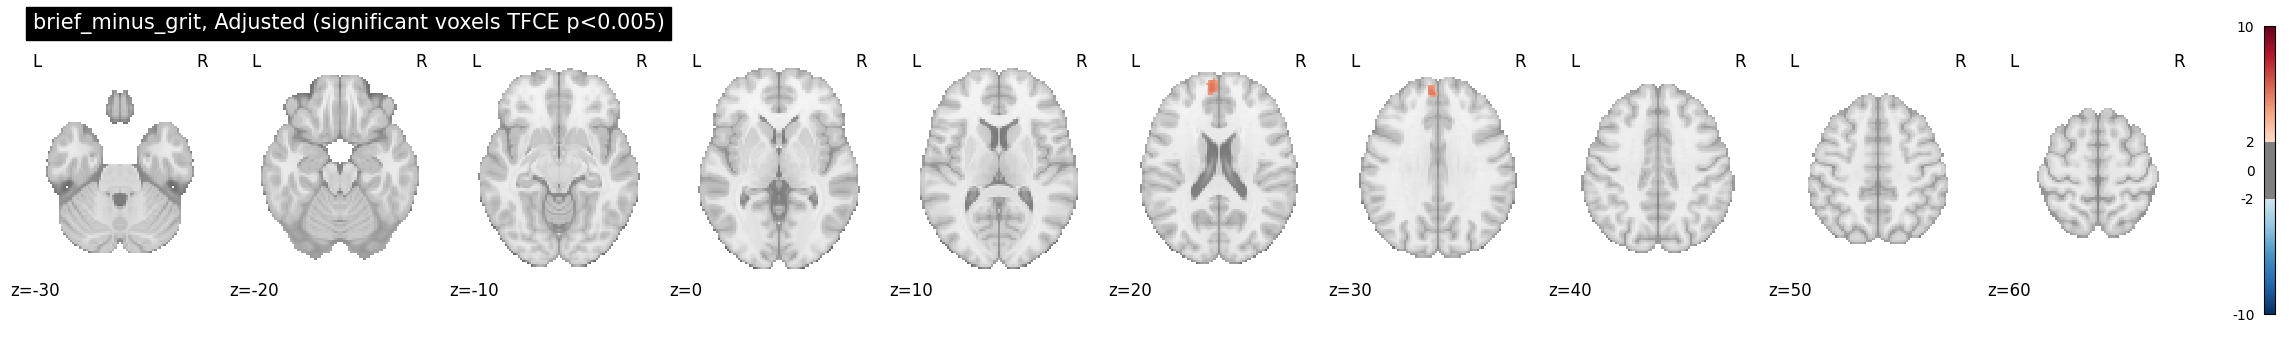

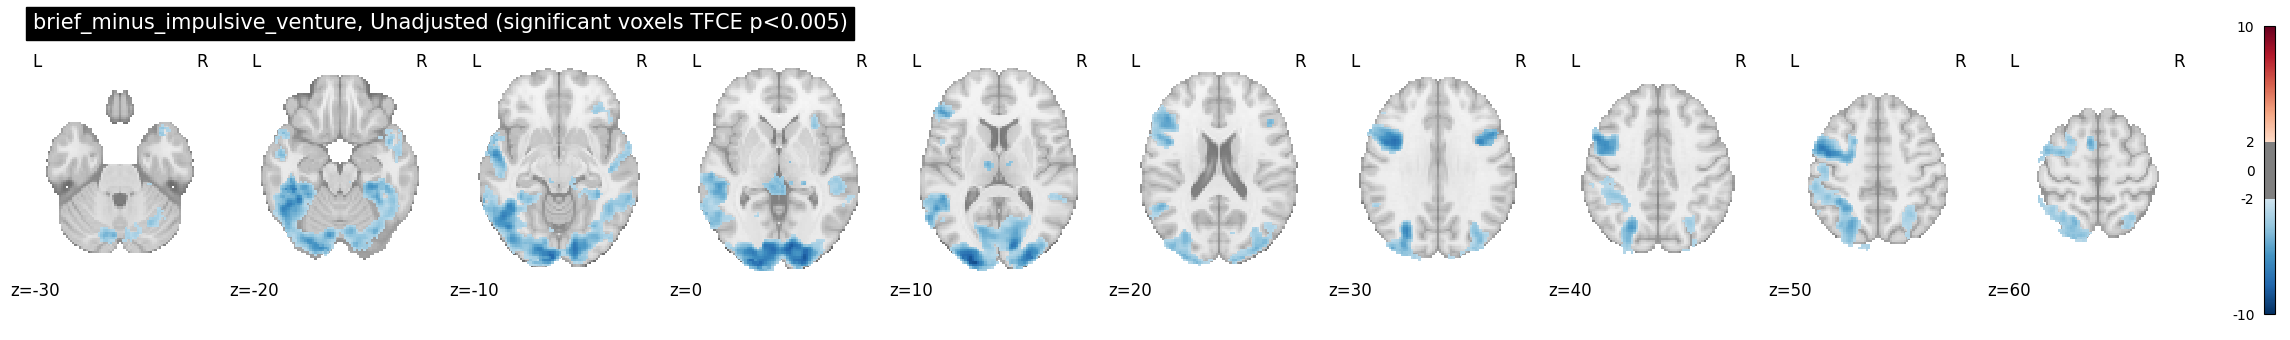

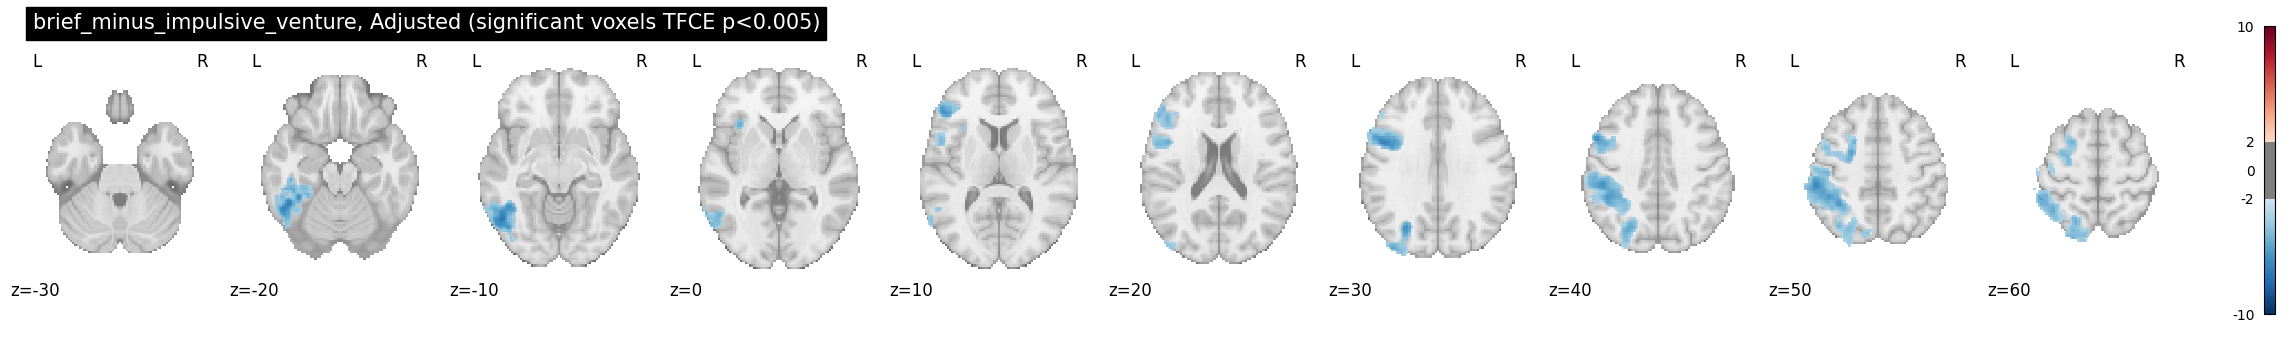

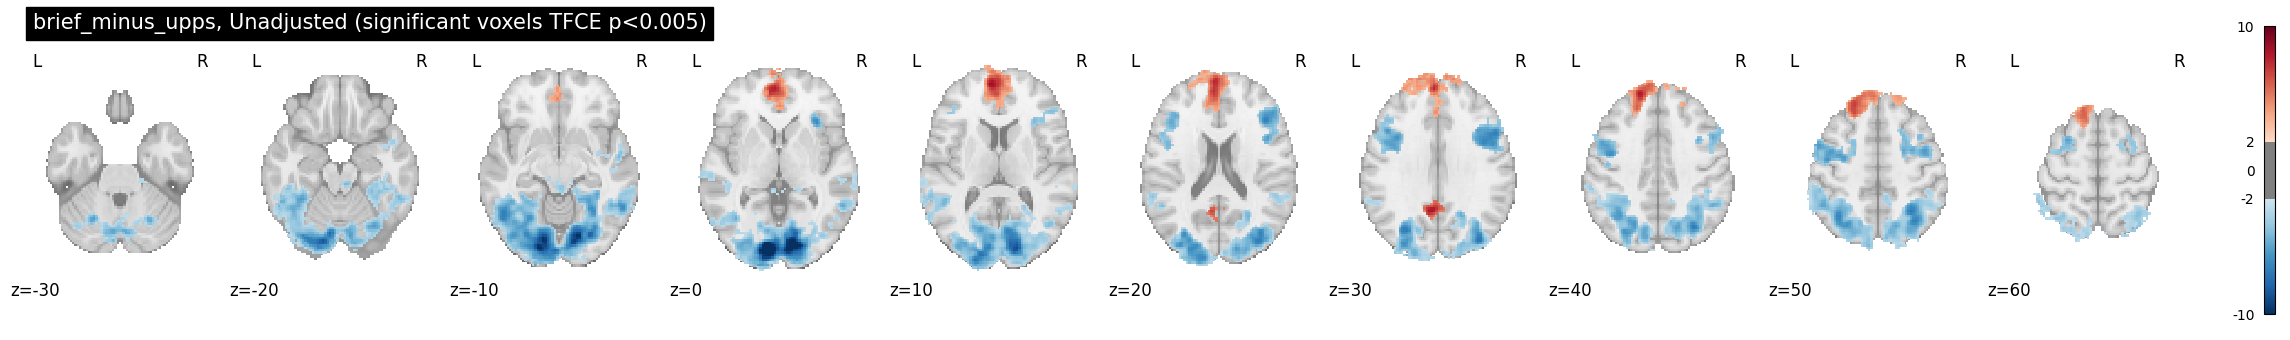

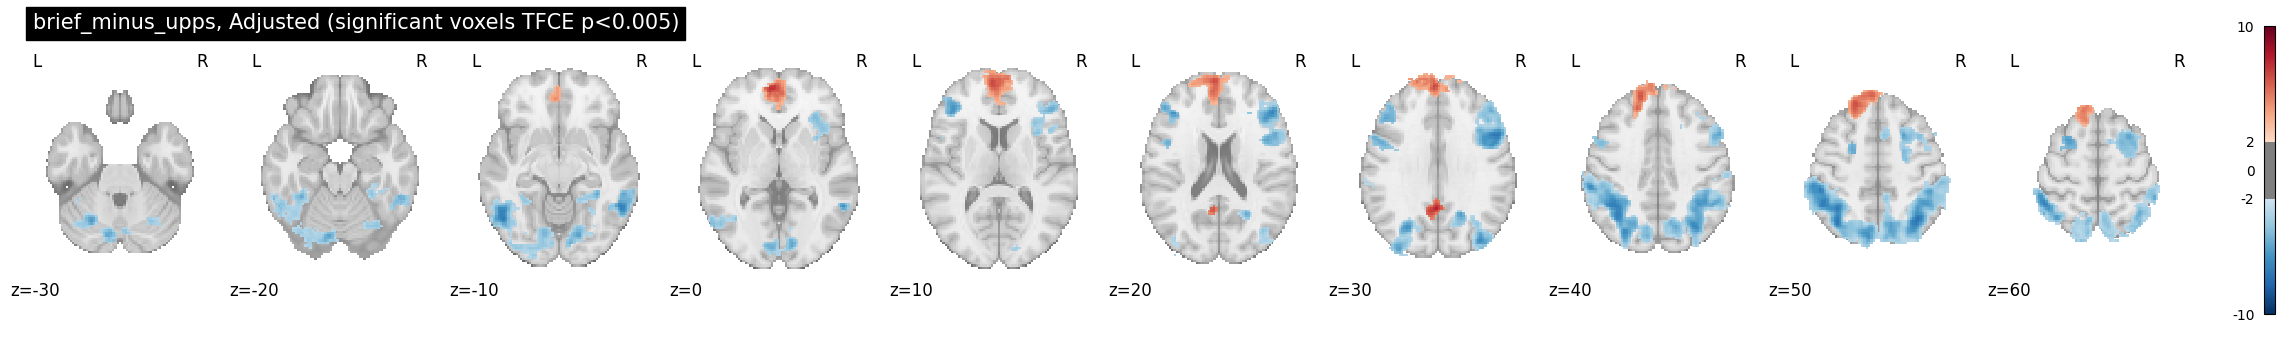

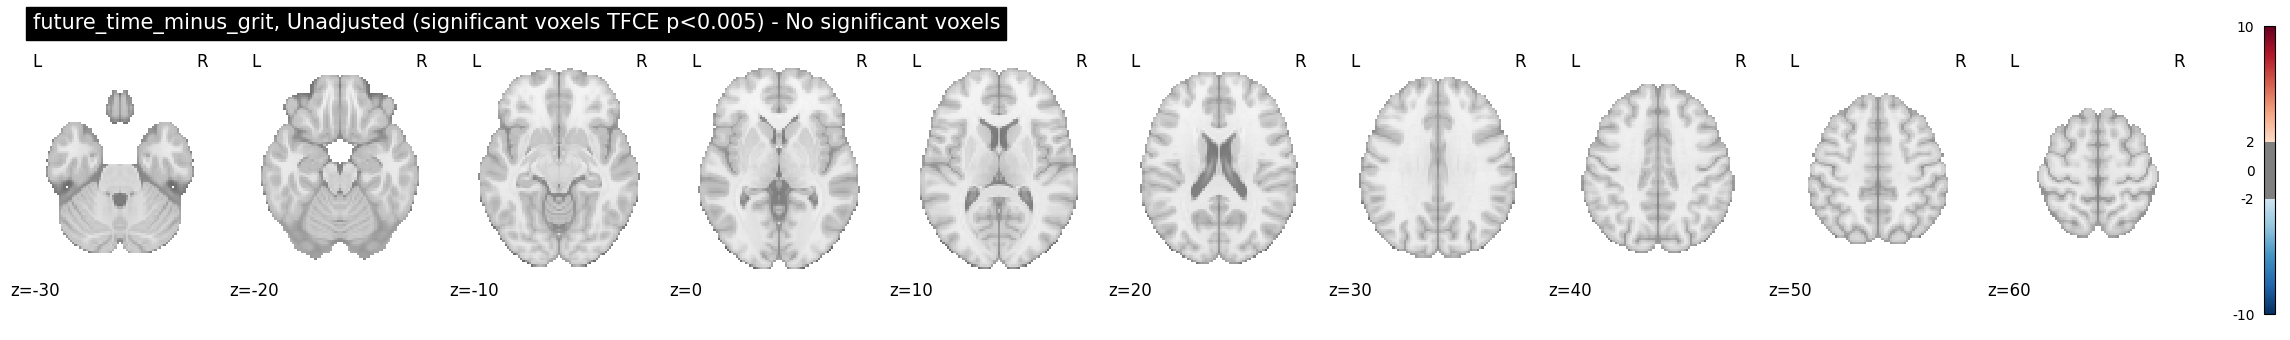

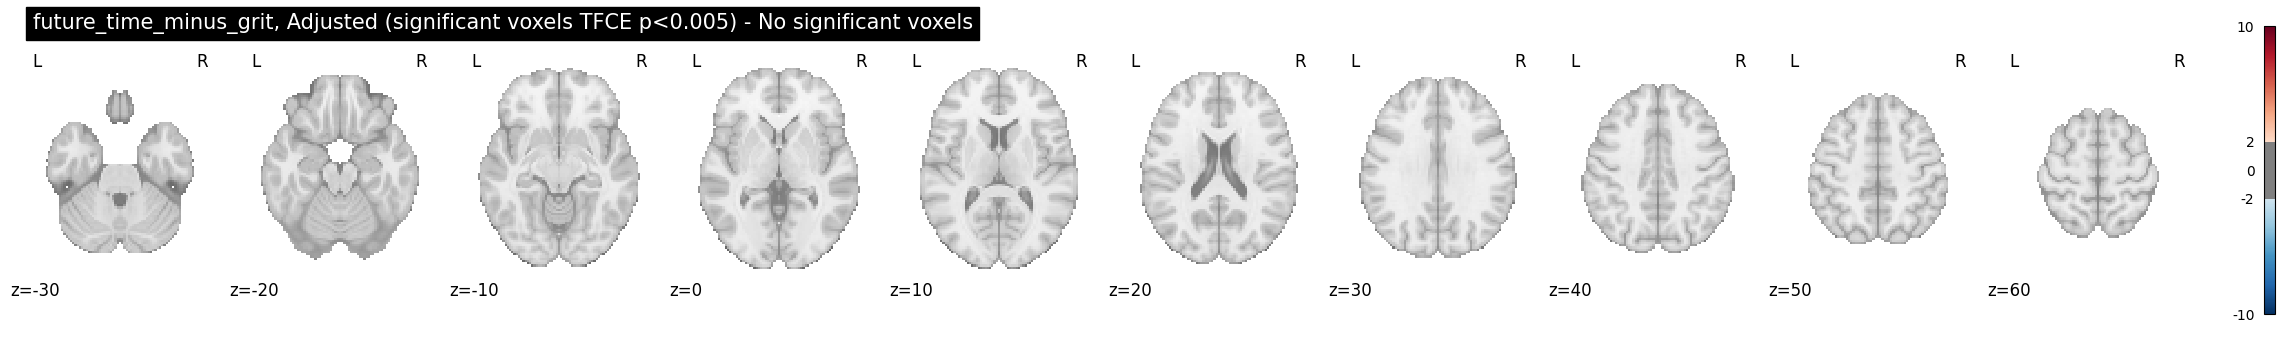

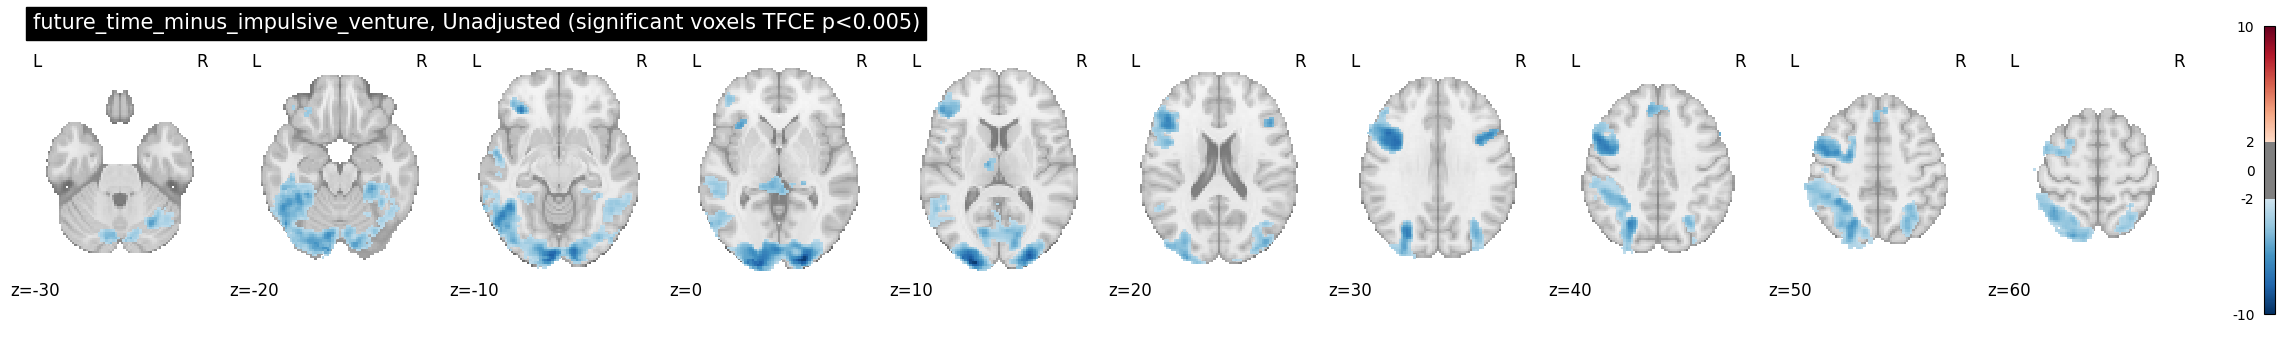

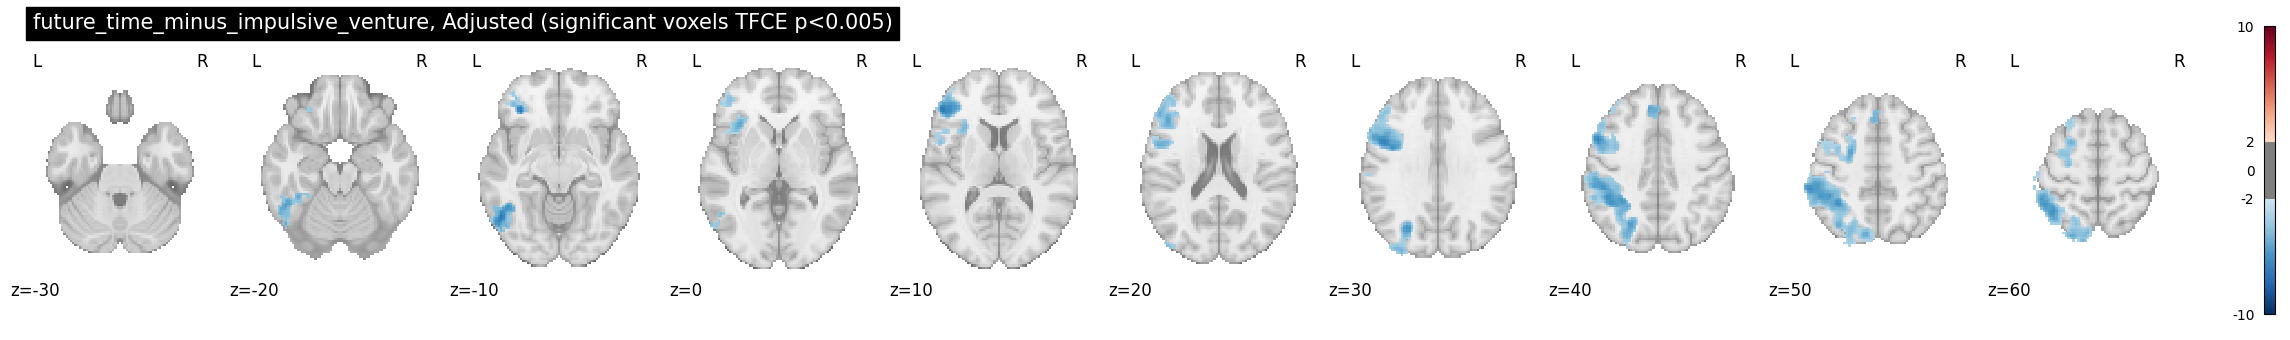

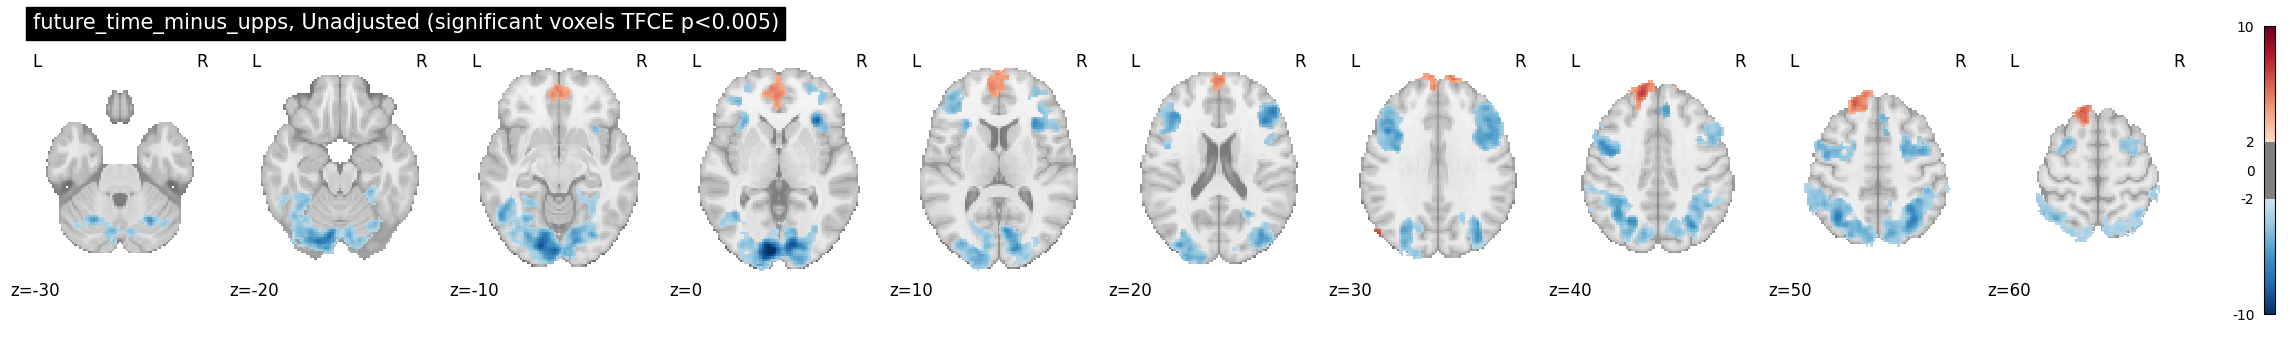

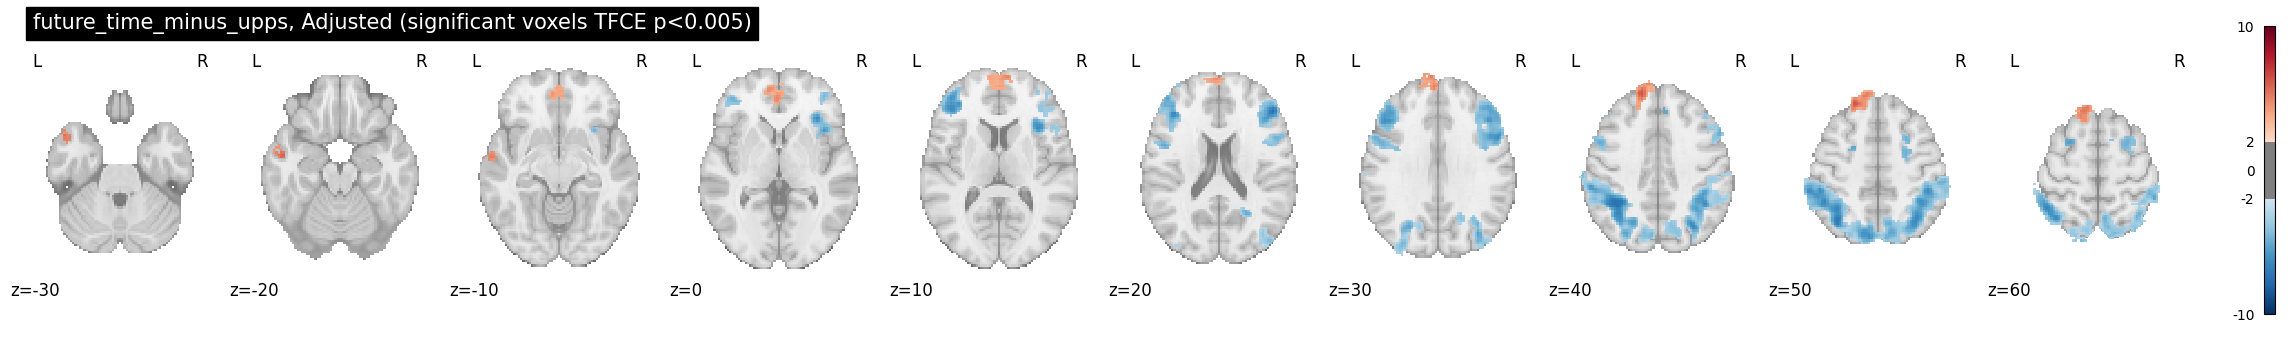

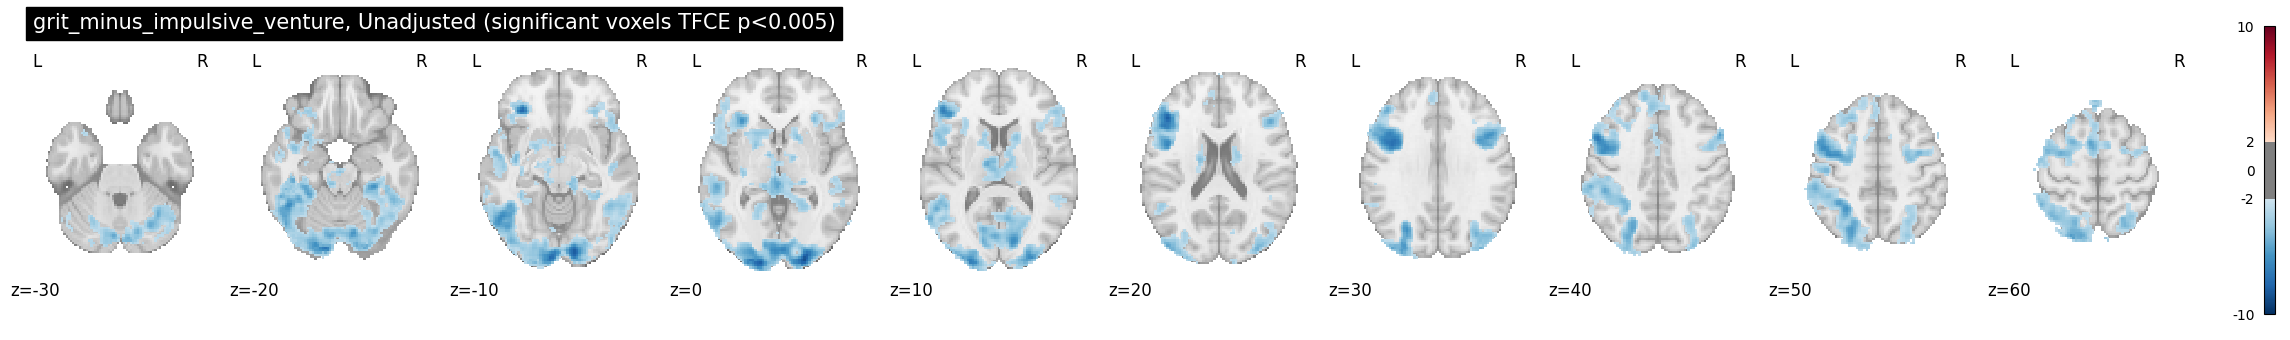

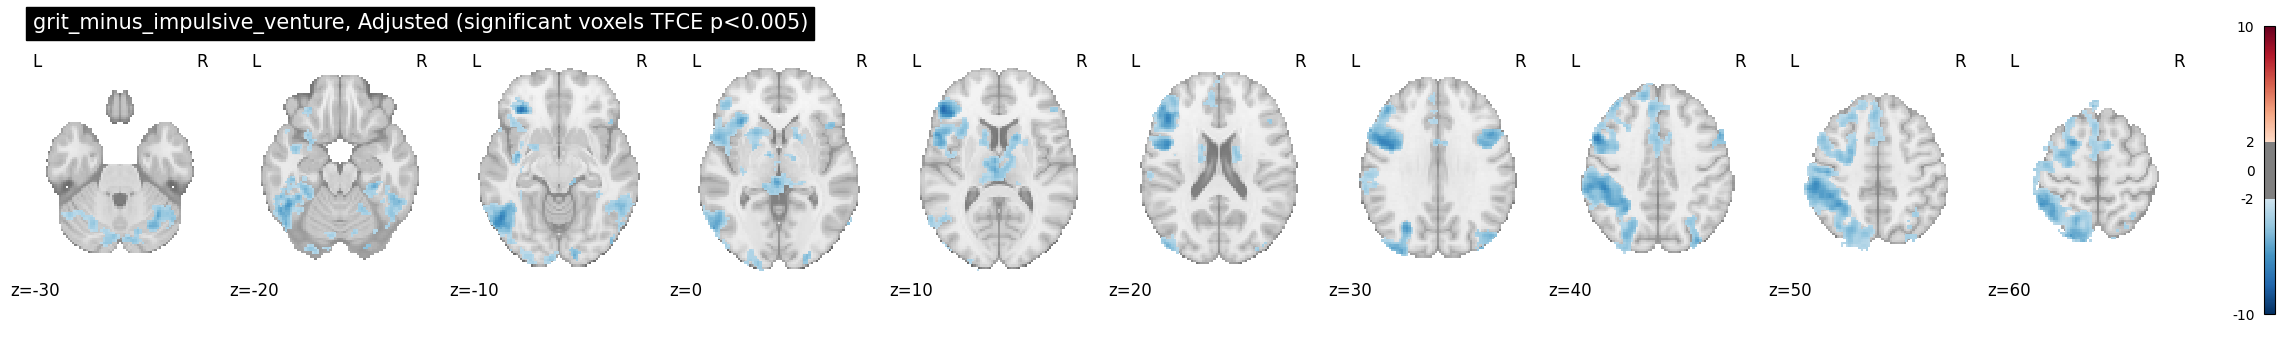

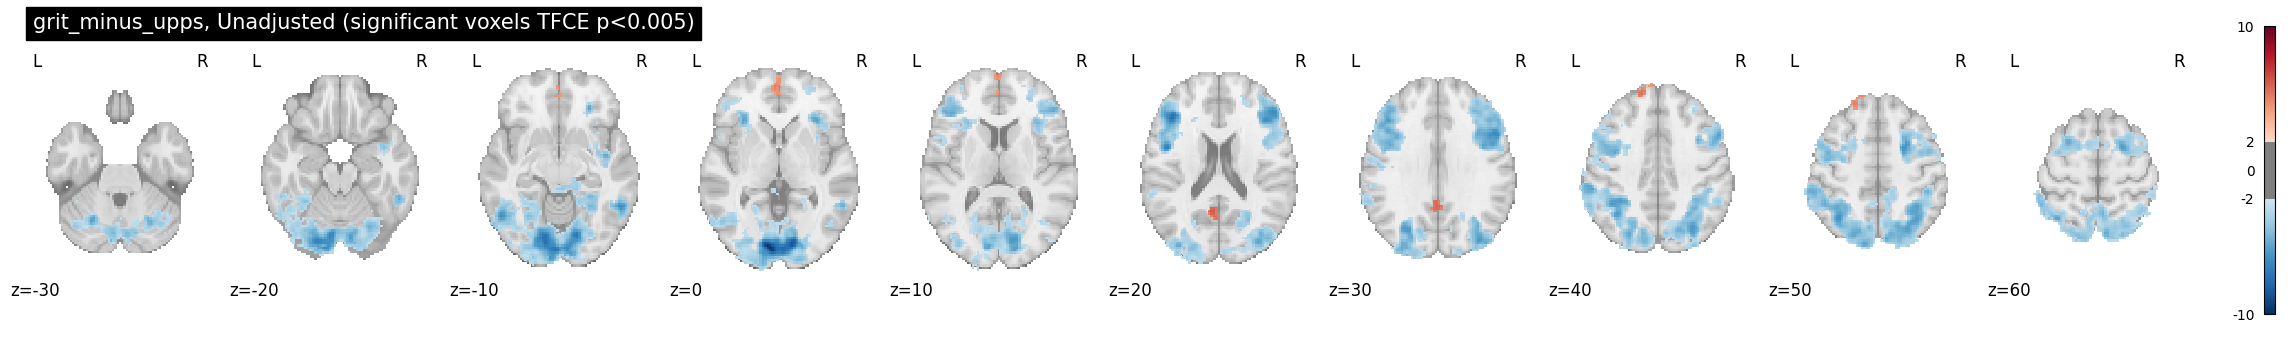

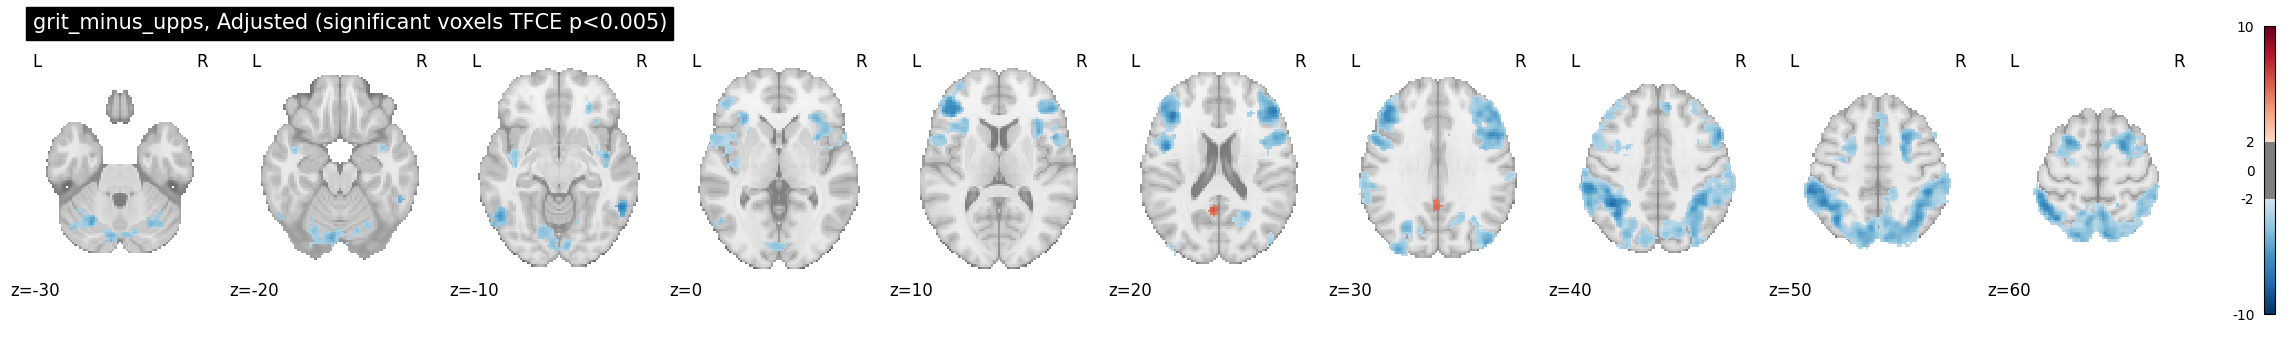

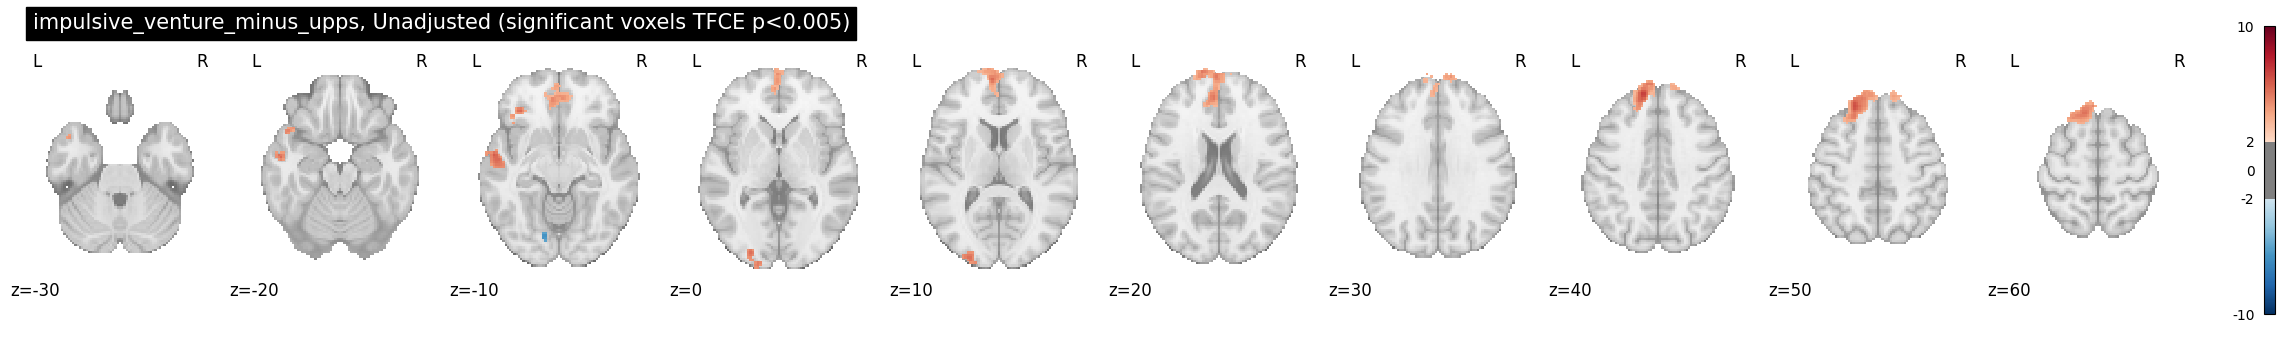

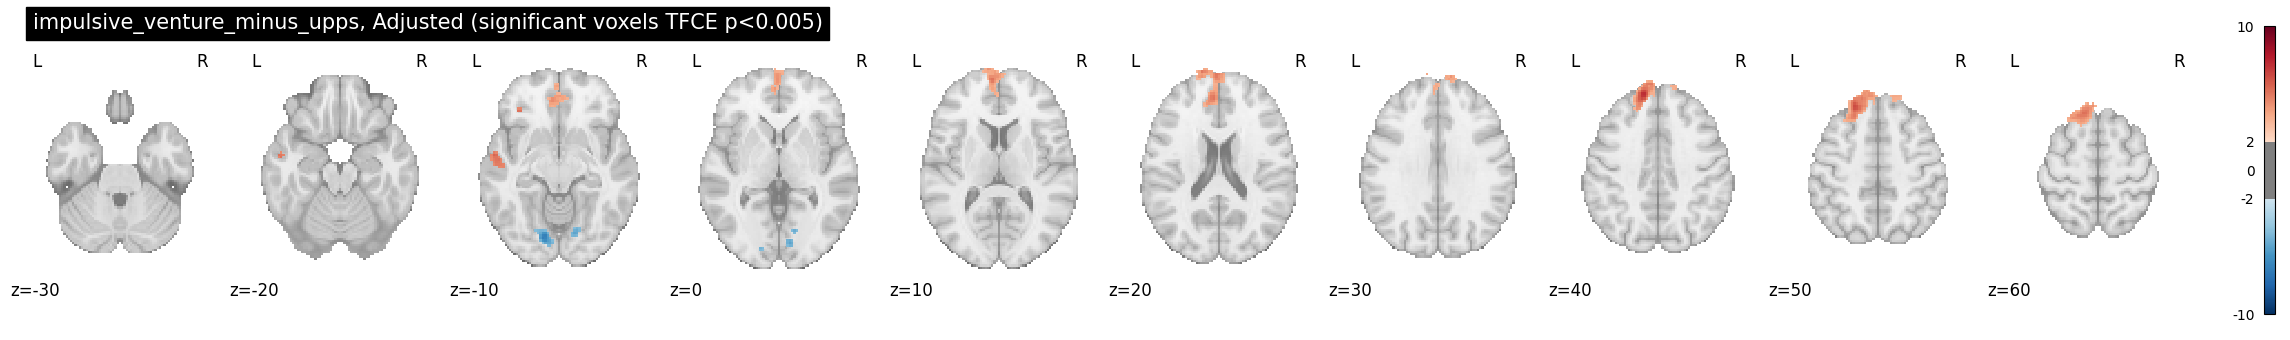

In [6]:
bon_thresh = 1 - (0.005)

z_slices = list(range(-30, 61, 10))

for map_label, map in question_pmaps.items():
    tmap = load_img(question_tmaps[map_label])
    pmap = load_img(map)
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Prepare the title
    title = f'{map_label}, Unadjusted (significant voxels TFCE p<{1 - bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()

    tmap = load_img(question_tmaps_adjusted[map_label])
    pmap = load_img(question_pmaps_adjusted[map_label])
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Prepare the title
    title = f'{map_label}, Adjusted (significant voxels TFCE p<{1 - bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()

### Don't Bonferroni correct for 10 tests

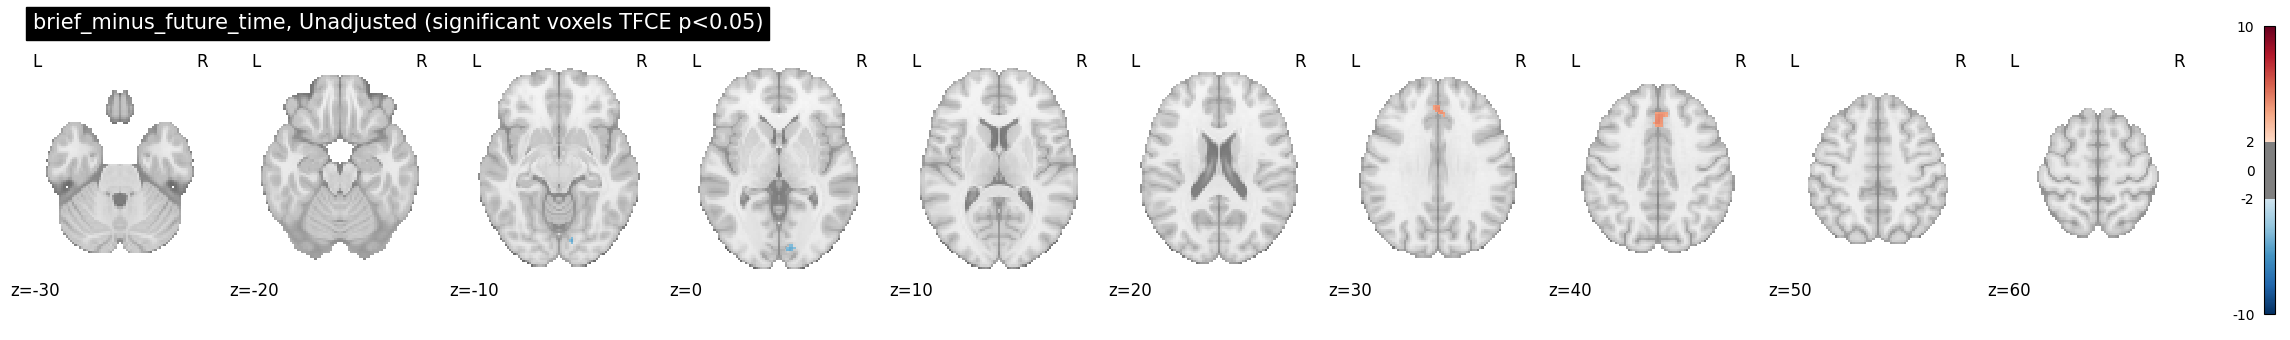

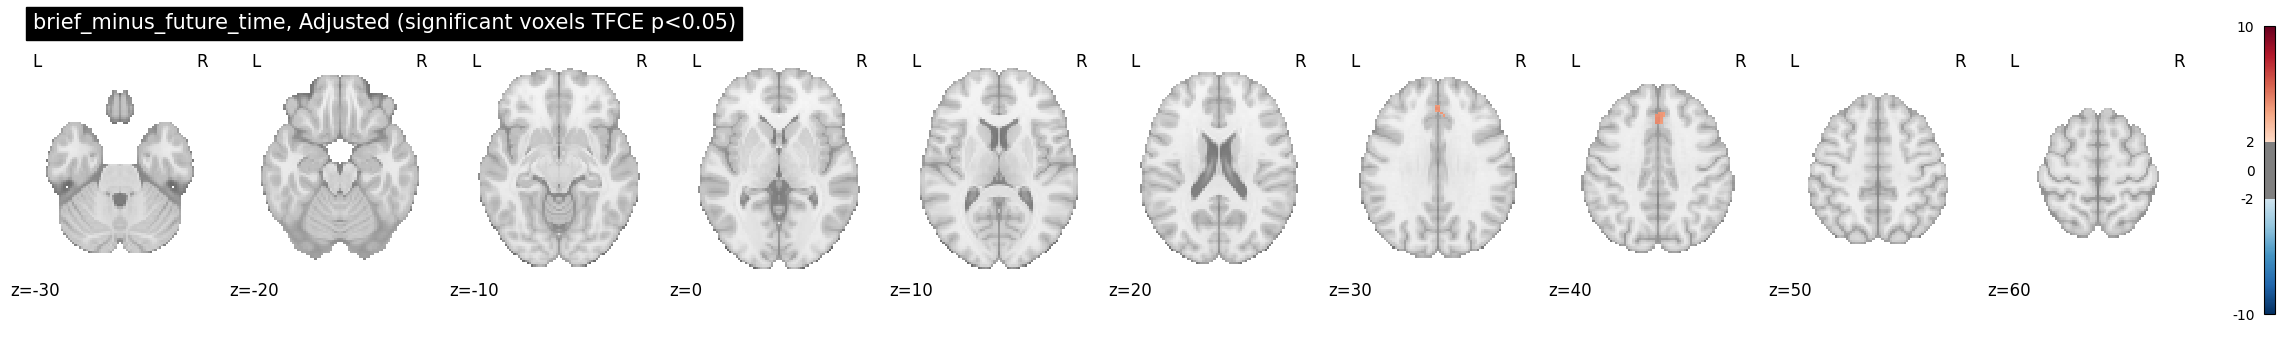

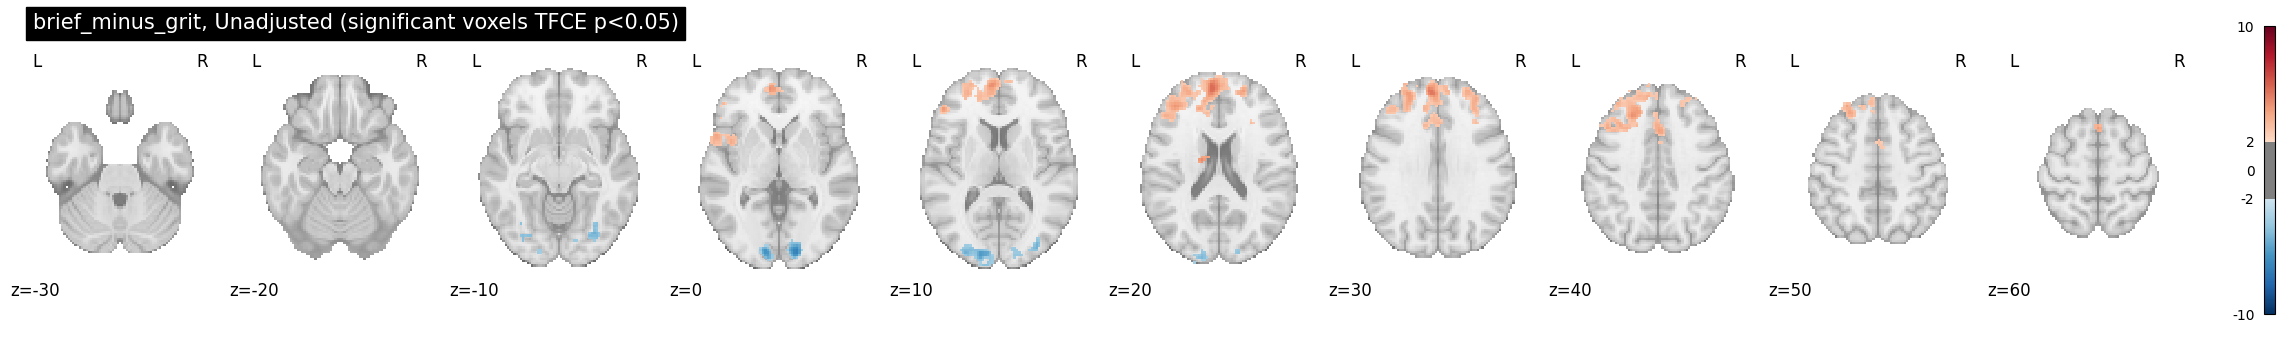

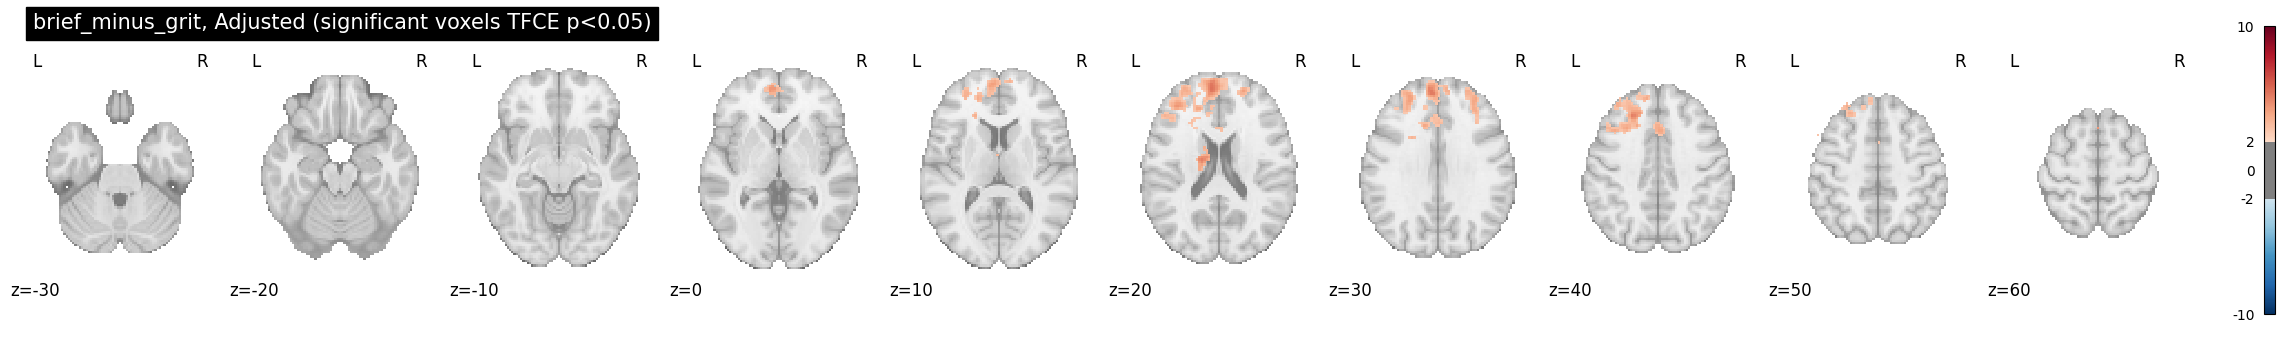

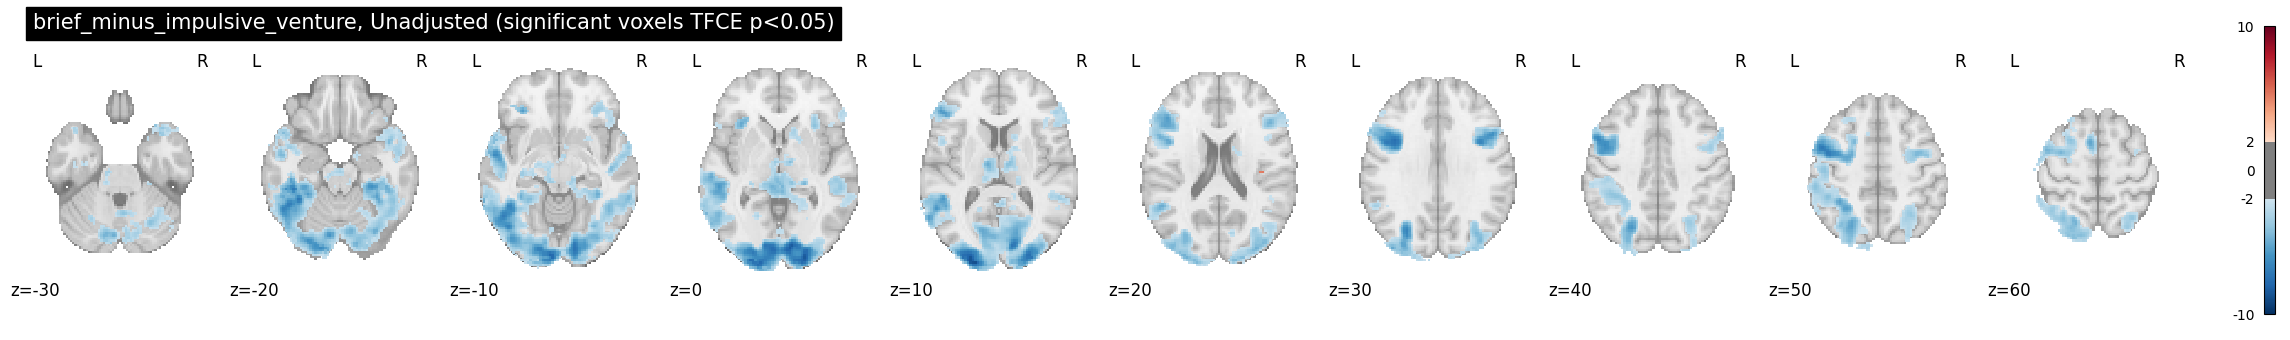

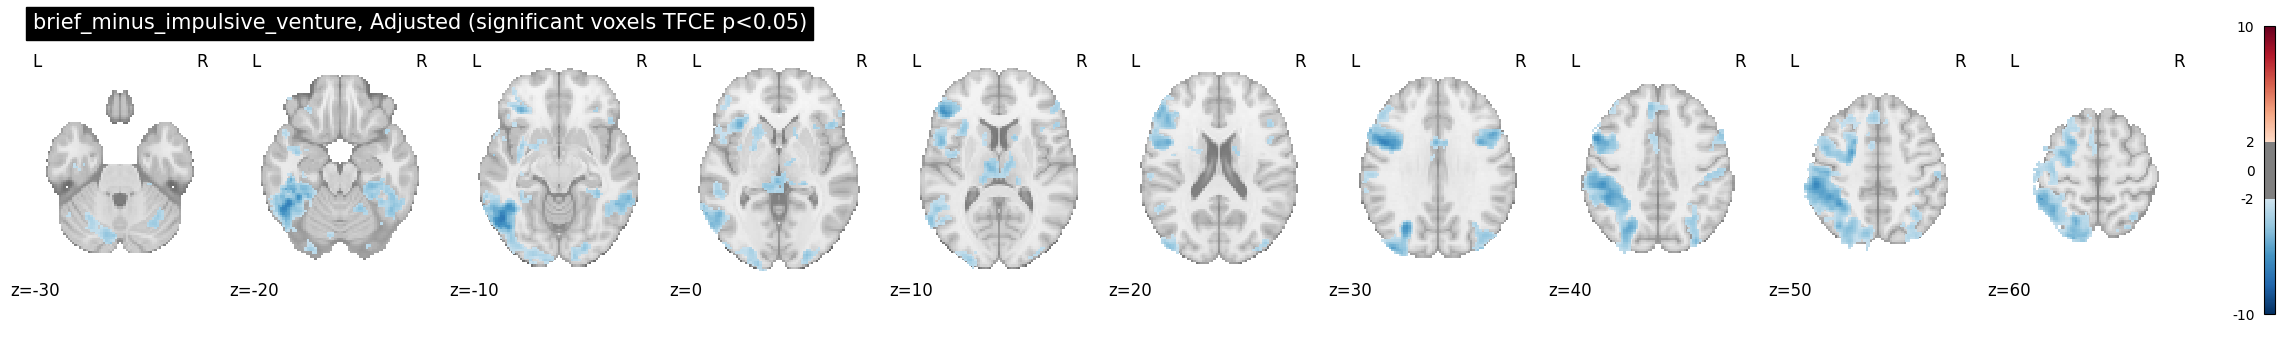

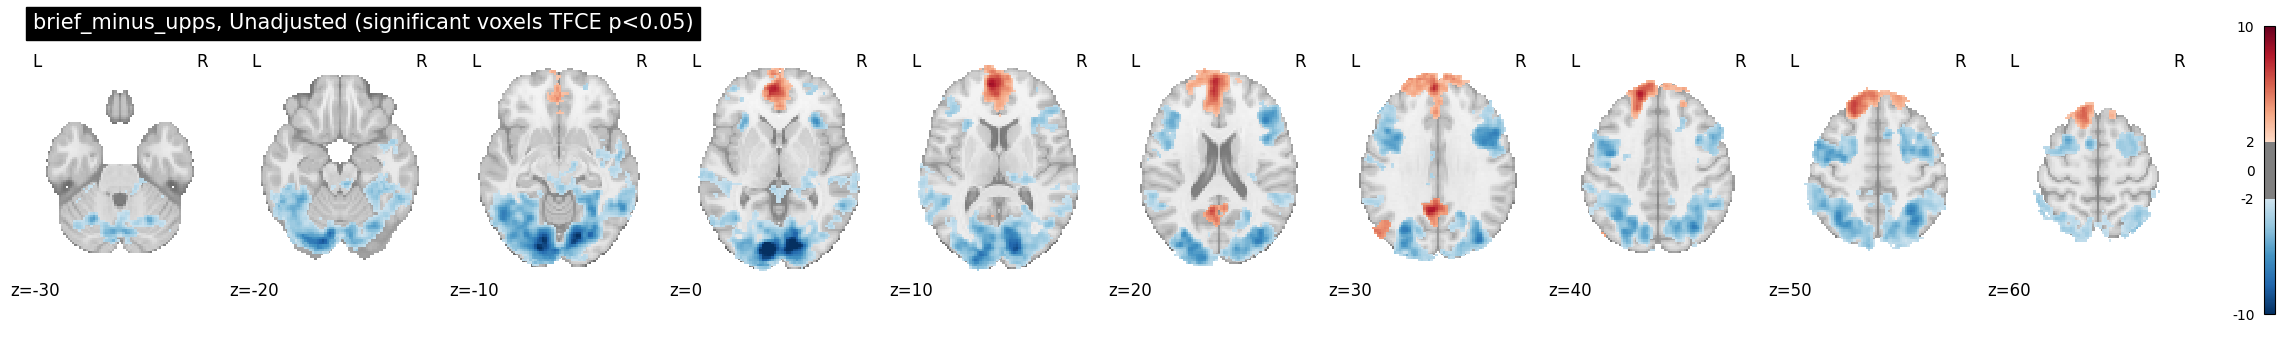

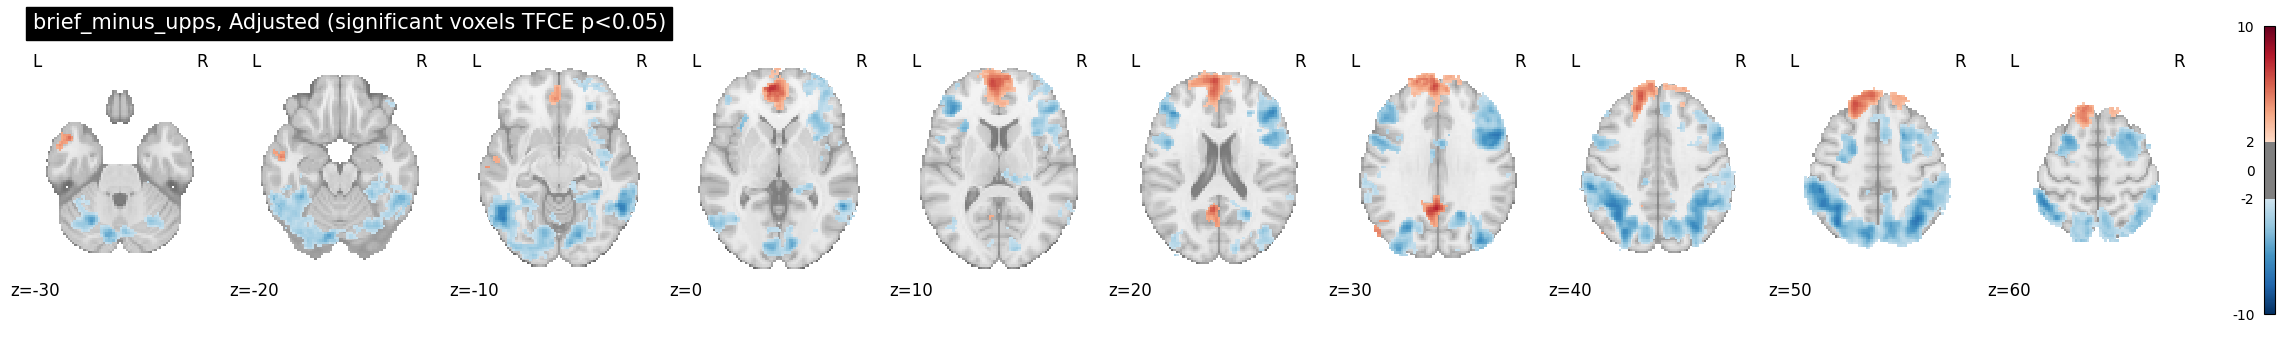

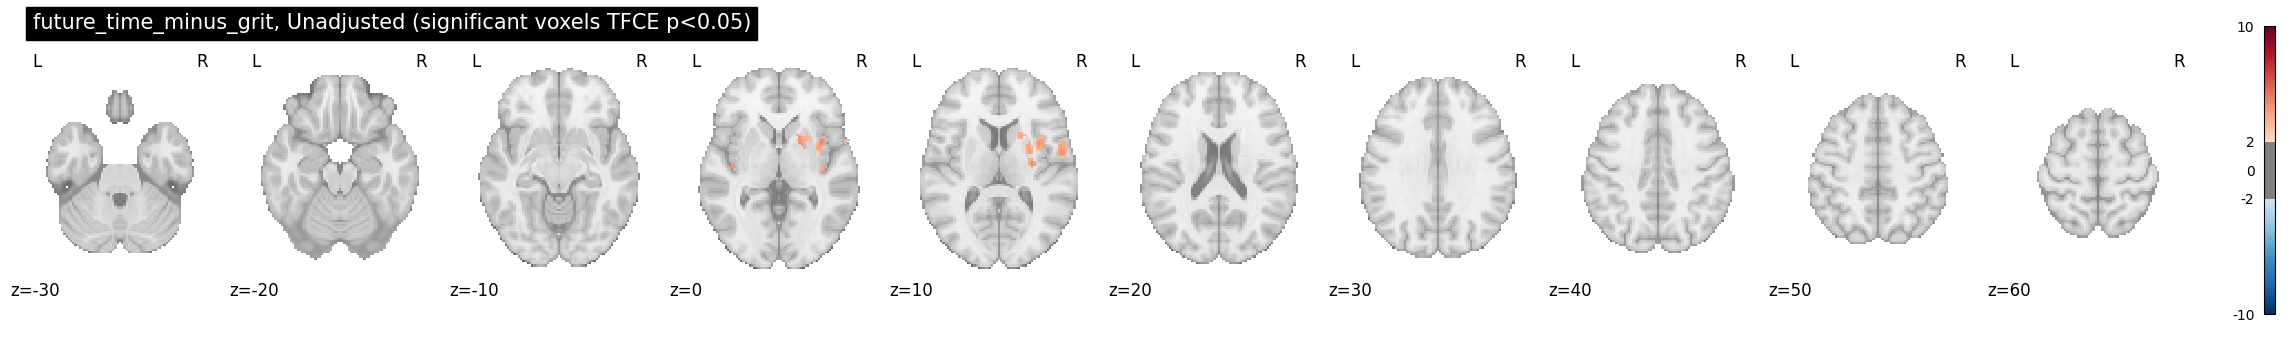

/tmp/ipykernel_231098/238433851.py:47: UserWarning: empty mask
  display = plot_stat_map(


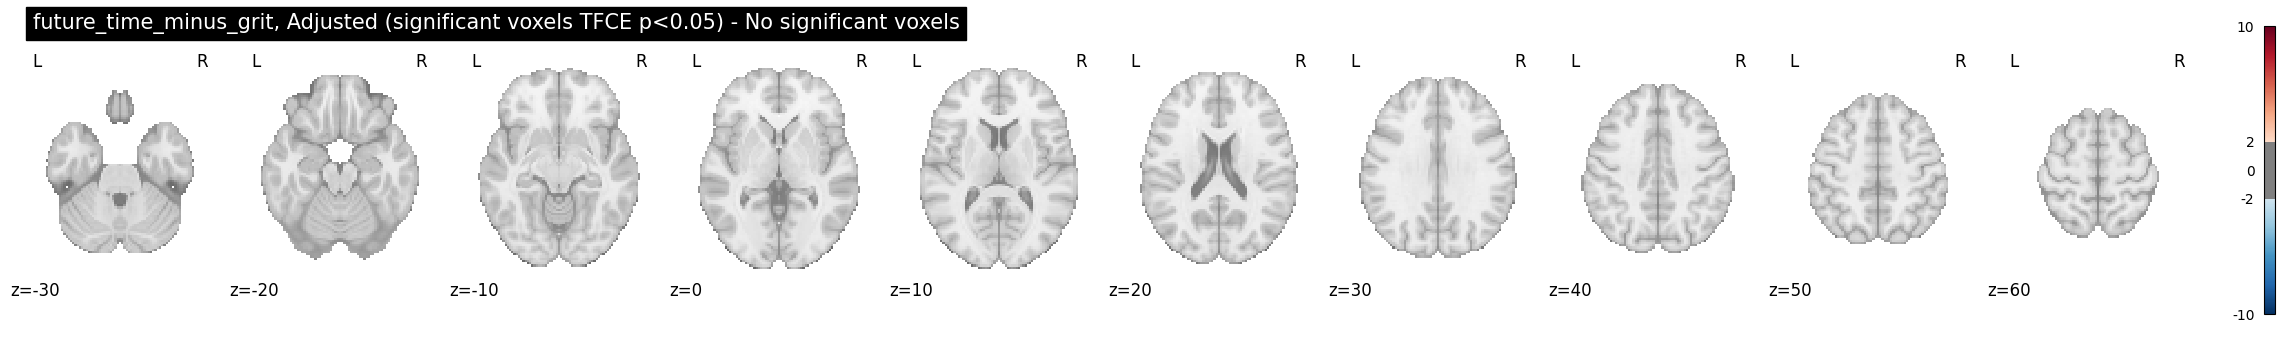

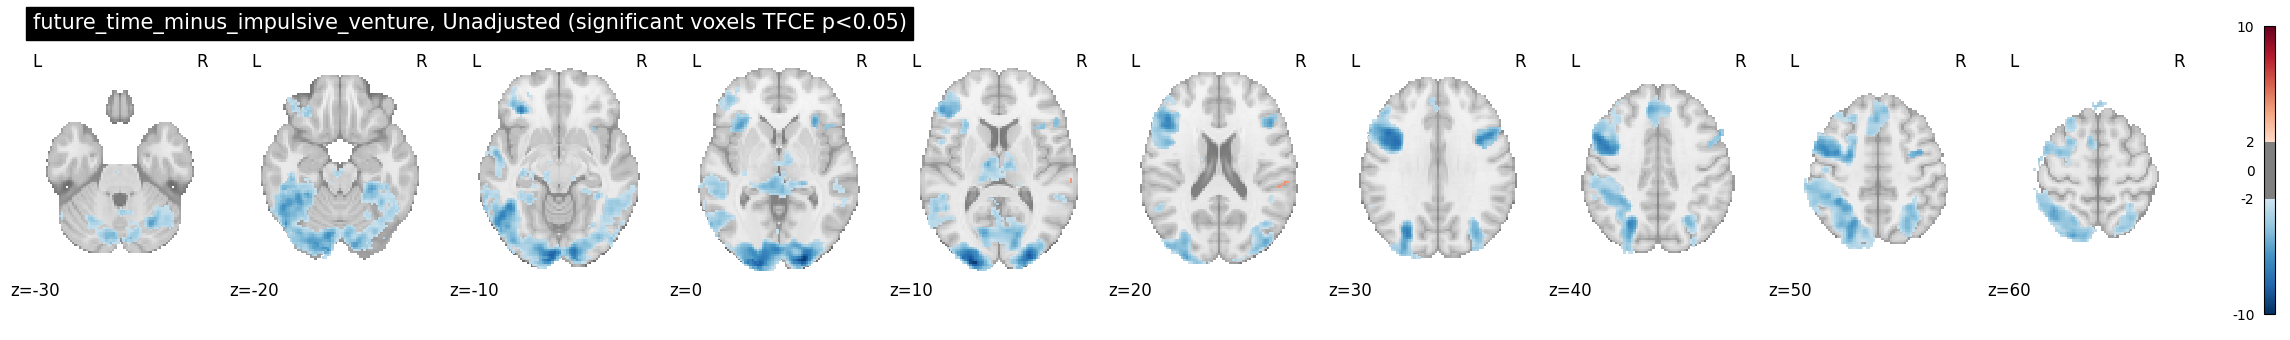

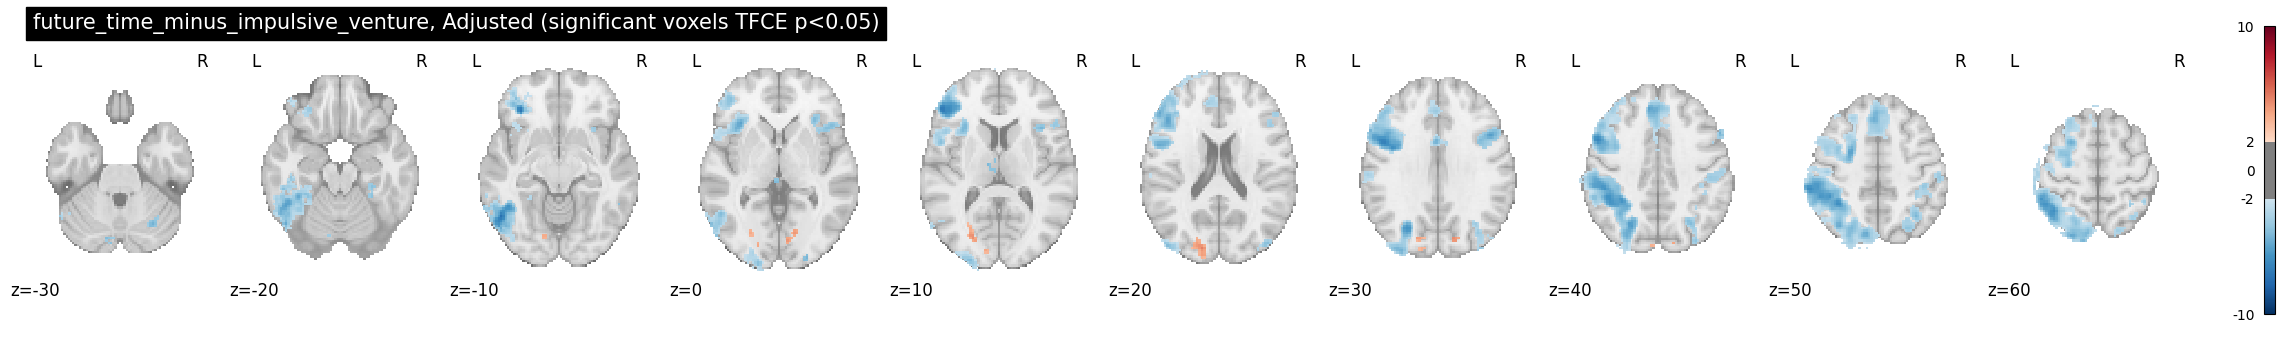

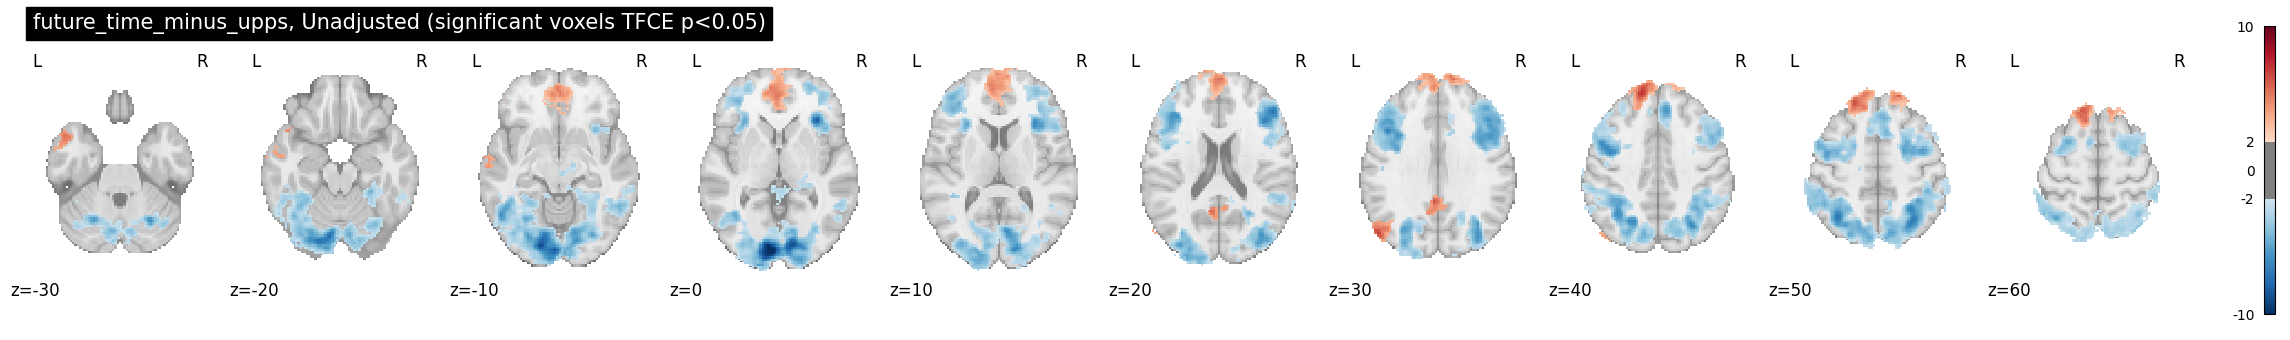

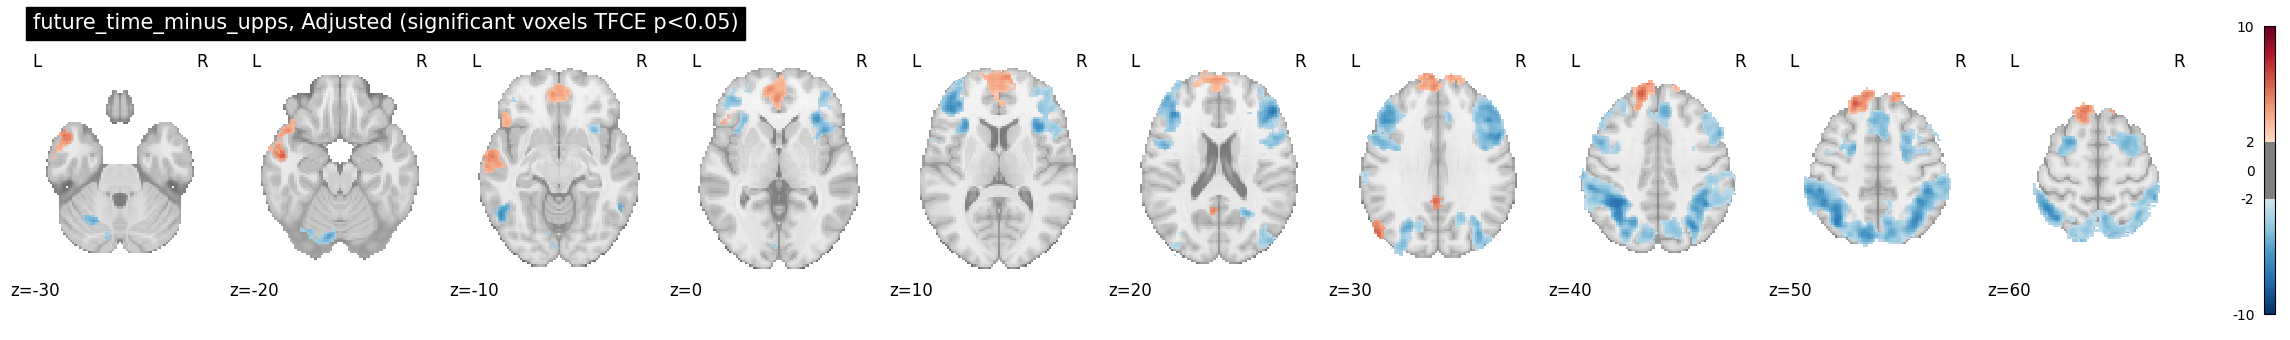

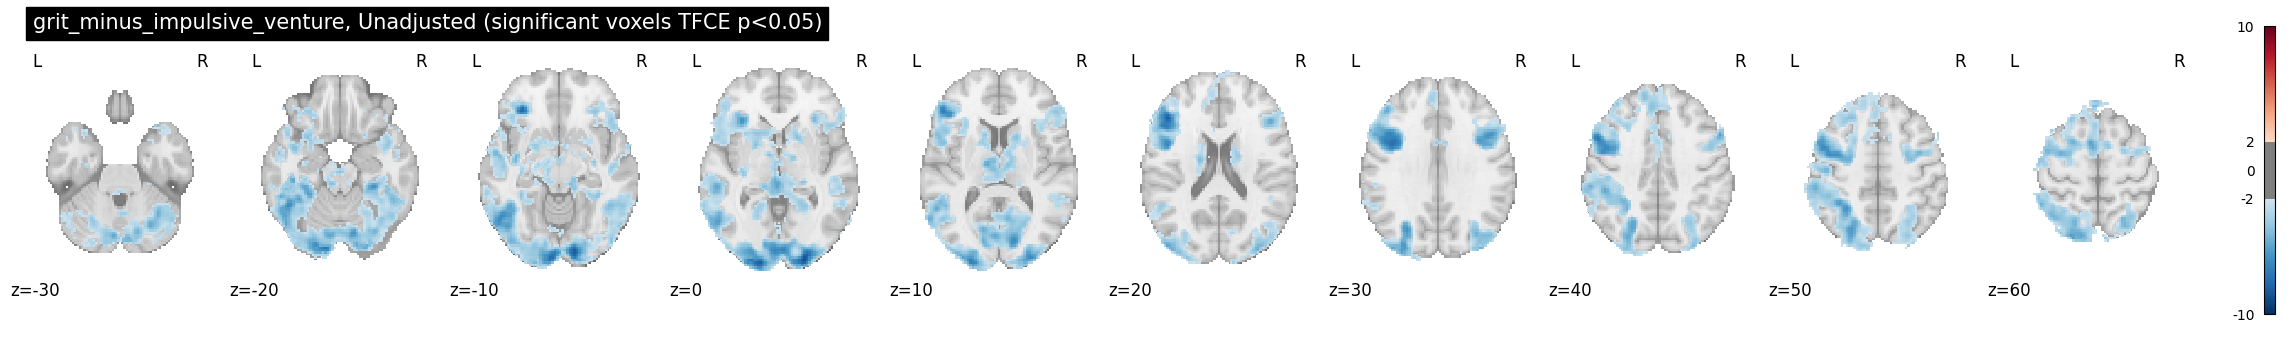

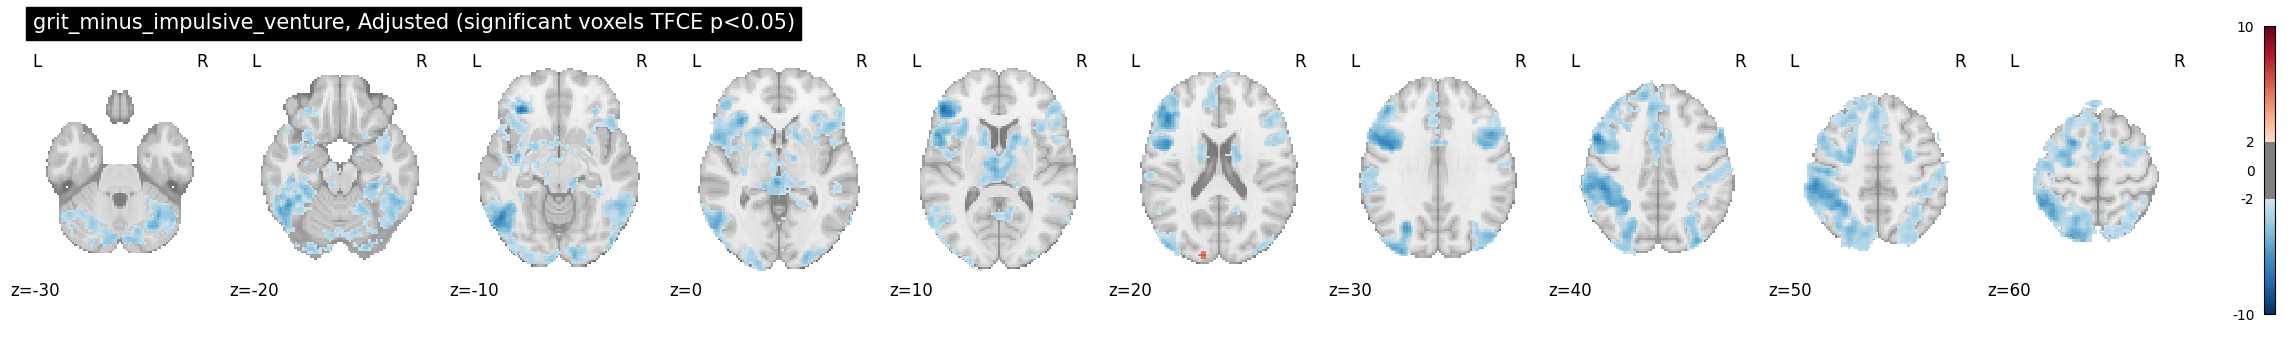

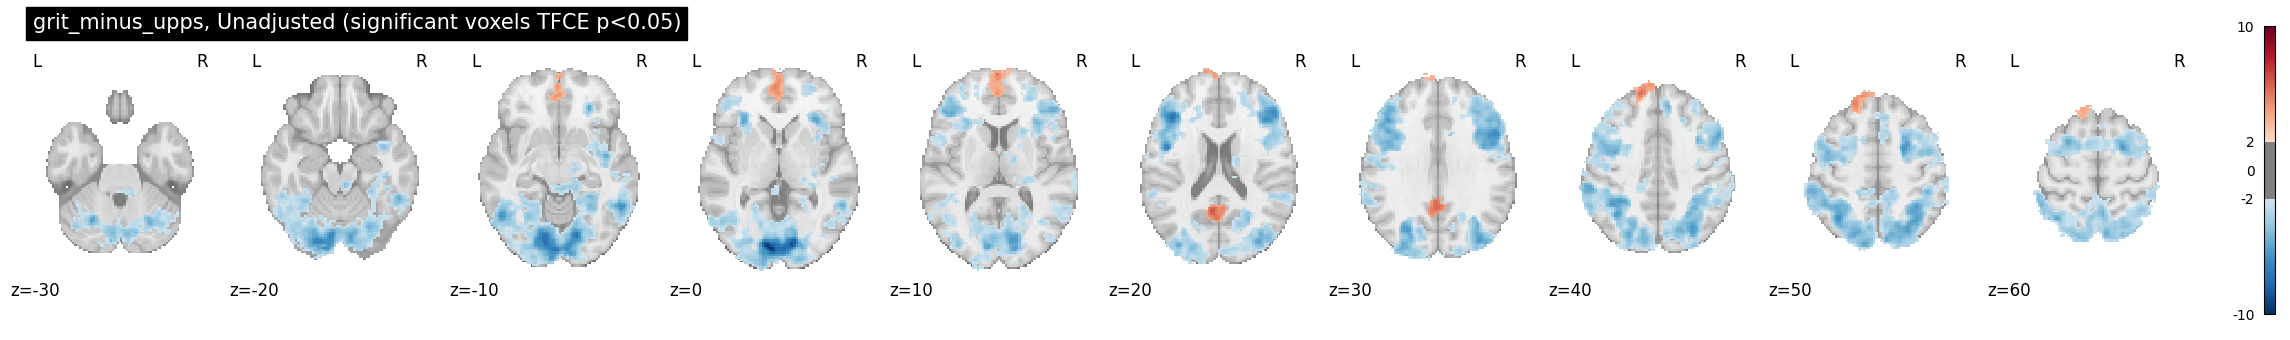

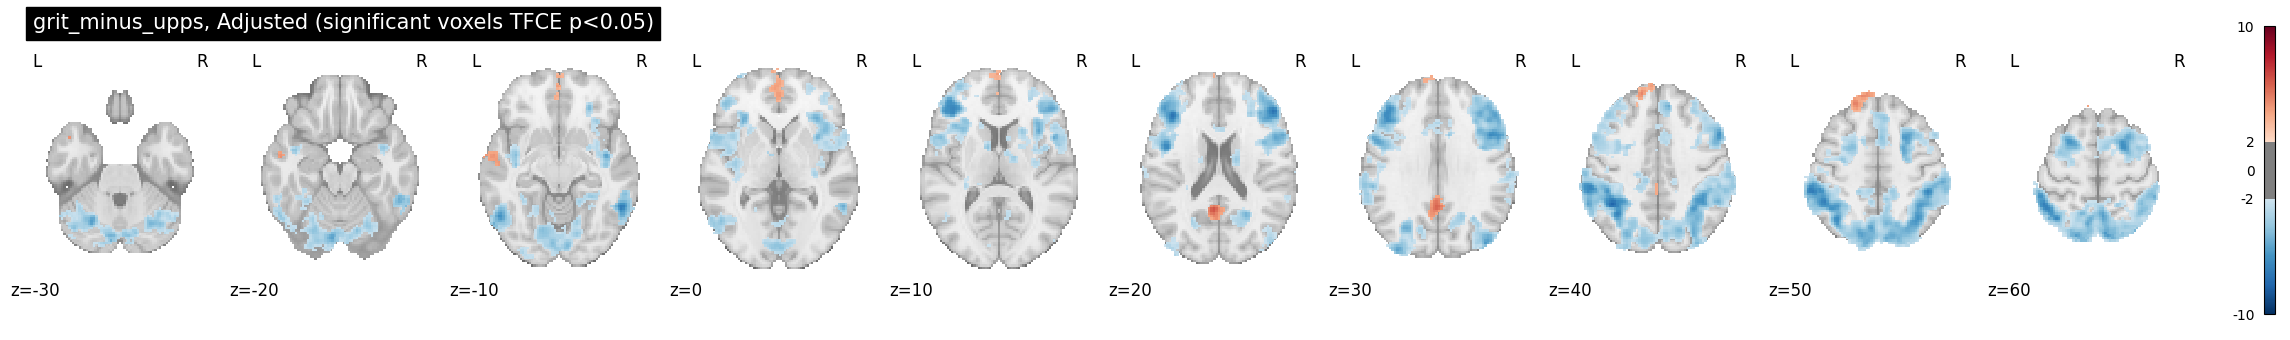

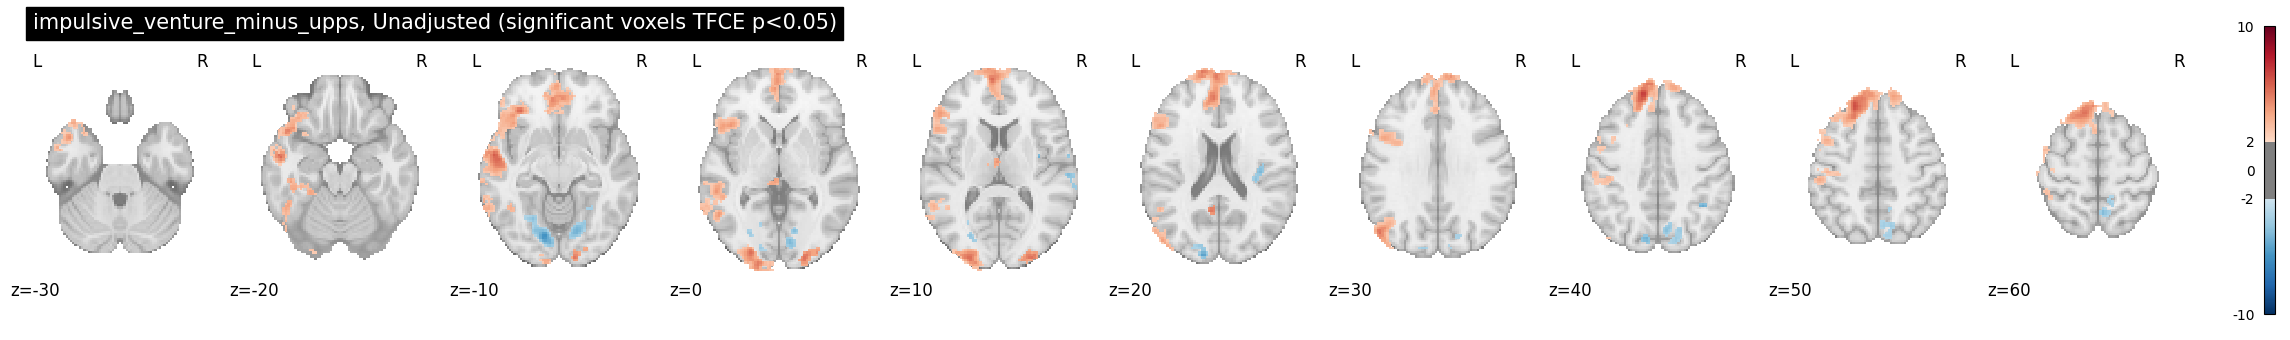

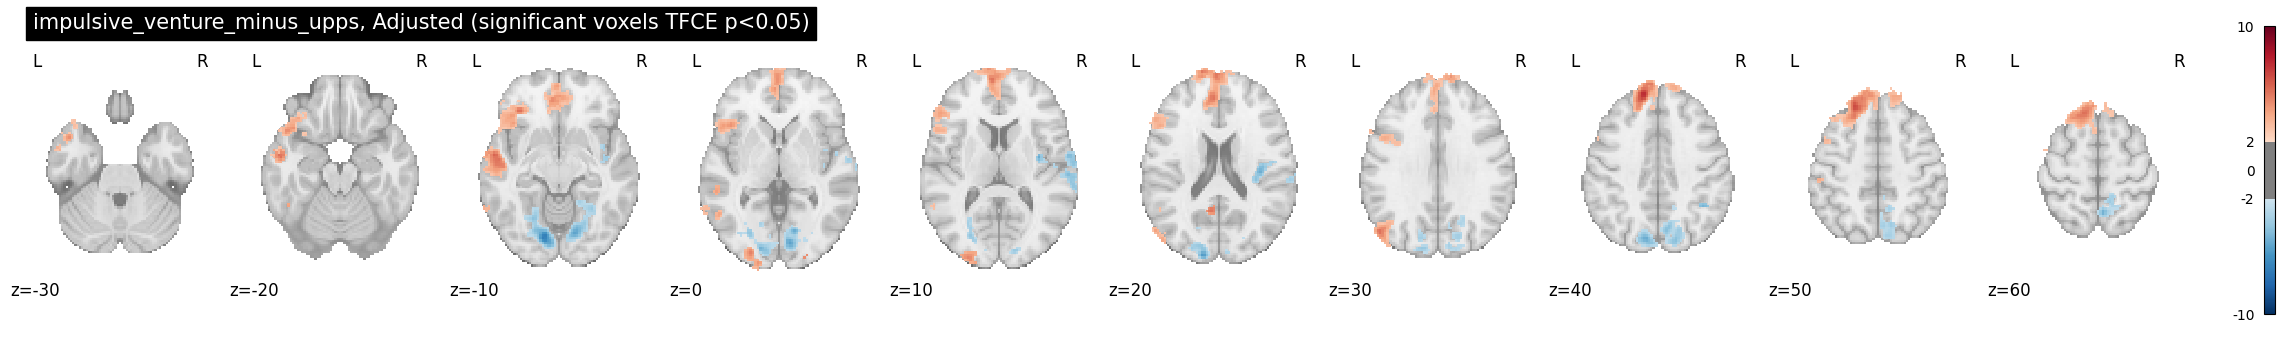

In [7]:
bon_thresh = 1 - (0.05)

z_slices = list(range(-30, 61, 10))

for map_label, map in question_pmaps.items():
    tmap = load_img(question_tmaps[map_label])
    pmap = load_img(map)
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Prepare the title
    title = f'{map_label}, Unadjusted (significant voxels TFCE p<{1 - bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()

    tmap = load_img(question_tmaps_adjusted[map_label])
    pmap = load_img(question_pmaps_adjusted[map_label])
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Prepare the title
    title = f'{map_label}, Adjusted (significant voxels TFCE p<{1 - bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()